# CS530 HW8

#### Question 1. (4 points)

a. For classification trees, implement three functions to calculate the (1) cross-entropy, (2) Gini index, and (3) misclassification error. Assume binary classification (labels are 0’s and 1’s). The functions takes p_1, the probability of a record belong to class k=1, as input.

In [237]:
import numpy as np
def cal_cross_entropy(p_1):
    p_2 = 1-p_1
    if(p_1 == 0 or p_2 == 0):
        cross_entropy = 0
    else:
        cross_entropy = -p_1*np.log2(p_2)
    return cross_entropy

def cal_gini_index(p_1):
    p_2 = 1-p_1
    gini_index = 1-(p_1**2 + p_2**2)
    return gini_index

def cal_misclassification_error(p_1):
    mc_error = 1-p_1
    return mc_error

b. Apply the three functions you implemented in 1a on the training test (train.csv) of the heart-disease dataset. Choose the 'age' variable as the root node. Use each value in the 'age' variable as the splitting value. Plot the cross entropy, Gini index, and misclassification error over age on the two child nodes after splitting.

In [238]:
# Your code goes here
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv("../grace_gupta_HW8/train.csv")
X = train.loc[:,'age':'thal']
y = train['target']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [239]:
# Your code goes here
root = X_train['age']
gini = []
cross_ent = []
error = [] 

for age in root:

    group1 = 0
    group2 = 0
    group1_zero = 0
    group2_zero = 0
    
    for i, row in X_train.iterrows():
        if(row['age'] > age):
            group1 += 1
            if(y_train.loc[i] == 0):
                group1_zero += 1
        else:
            group2 += 1
            if(y_train.loc[i] == 0):
                group2_zero += 1

    #calculate probabilities
    if(group1 == 0):
        group1_p0 = 0
    else:
        group1_p0 = group1_zero/group1
    if(group2 == 0):
        group2_p0 = 0
    else:
        group2_p0 = group2_zero/group2
    
    gini_score = (cal_gini_index(group1_p0) + cal_gini_index(group2_p0))/2
    gini.append(gini_score)
    entropy_score = (cal_cross_entropy(group1_p0) + cal_cross_entropy(group2_p0))/2
    cross_ent.append(entropy_score)
    
    if(group1_p0 > 1-group1_p0):
        error_score = cal_misclassification_error(group1_p0)
    else:
        error_score = cal_misclassification_error(1-group1_p0)
    if(group2_p0 > 1-group2_p0):
        error_score = cal_misclassification_error(group2_p0)
    else:
        error_score = cal_misclassification_error(1-group2_p0)
    error.append(error_score)

<function matplotlib.pyplot.show(*args, **kw)>

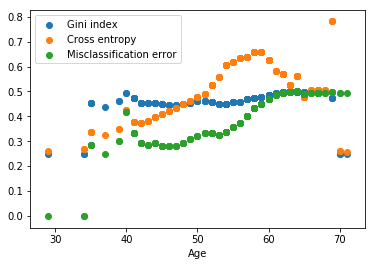

In [240]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(root, gini, label='Gini index')
plt.scatter(root, cross_ent, label='Cross entropy')
plt.scatter(root, error, label='Misclassification error')
plt.xlabel("Age")
plt.legend(loc='upper left')
plt.show

c. Discuss what you find in 1b. What age would you choose for the splitting value?

Around 60 years old****

#### Question 2. (3 points)

a. Implement a function to carry out the regression tree algorithm using the greedy approach. This implementation assumes the tree only splits twice. The function takes inputs X_train, y_train, and X_test, and return a prediction y_pred for X_test.

In [241]:
def get_split(X_train, y_train):
    min_error = 1
    tuple_info = ()
    for c in range(X_train.shape[1]): #for every column
        for value in X_train[:,[c]]: #value to split on
            group1_labels = []
            group2_labels = []
            group1_indexes = []
            group2_indexes = []
            for r in range(X_train.shape[0]):
                if X_train[r][c] > value:
                    group1_labels.append(y_train[r])
                    group1_indexes.append(r)
                else:
                    group2_labels.append(y_train[r])
                    group2_indexes.append(r)
            #average labels for each group
            avg1 = np.sum(group1_labels)/len(group1_labels)
            avg2 = np.sum(group2_labels)/len(group2_labels)
            #calculate error
            error1 = (y_train[r]-avg1)**2
            error2 = (y_train[r]-avg2)**2
            #update which column, value has the least error
            if(error1 < min_error and error1 < error2):
                min_error = error1
                tuple_info = (c, value, avg1, avg2)
            elif(error2 < min_error and error2 < error1):
                min_error = error2
                tuple_info = (c, value, avg1, avg2)
                
    return group1_indexes, group2_indexes, tuple_info

In [242]:
def regression_tree(X_train, y_train, X_test):
    group1_indexes, group2_indexes, tuple_info = get_split(X_train, y_train)
    group11_indexes, group12_indexes, tuple_info_1 = get_split(X_train[group1_indexes], y_train[group1_indexes]) #split on right node
    group21_indexes, group22_indexes, tuple_info_2 = get_split(X_train[group2_indexes], y_train[group2_indexes]) #split on left node    
    #group11 = right right
    #group12 = right left
    #group21 = left right
    #group22 = left left
    
    first_split_value = tuple_info[1][0]
    right_split_value = tuple_info_1[1][0]
    left_split_value = tuple_info_2[1][0]
    
    first_col = tuple_info[0]
    right_col = tuple_info_1[0]
    left_col = tuple_info_2[0]

    y_pred = []
    for r in range(X_test.shape[0]):
        if(X_test[r][first_col] > first_split_value):
            if(X_test[r][right_col] > right_split_value):
                y_pred.append(tuple_info_1[2])
            else:
                y_pred.append(tuple_info_1[3])
        else:
            if(X_test[r][left_col] > left_split_value):
                y_pred.append(tuple_info_2[2])
            else:
                y_pred.append(tuple_info_2[3])
                
    y_pred = np.array(y_pred)
    
    return y_pred

b. Use the function you implemented in 2a to predict on the synthetic data below.

In [243]:
# Your code goes here
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# make a linearly separable dataset
X, y = make_regression(n_samples=1000,
                       n_features=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [244]:
y_pred = regression_tree(X_train, y_train, X_test)

/Users/gracegupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


In [245]:
print(y_pred.shape)
print(y_test.shape)

(330,)
(330,)


c. Do you think this implementation of the regression tree is a good model for this dataset? Explain.

No, it is likely to not be a good model for the dataset because, since there are 2 splits, there are only 4 values from which to choose a prediction. The test set contains values that vary widely from those 4 values. 

#### Question 3. (3 points)

a. Use the scikit-learn package to run Bagging and Random Forest on the heart-disease dataset and predict on its test set. Use cross-validation to find the best parameters for these algorithms.

In [251]:
X = train.loc[:,'age':'thal']
y = train['target']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [252]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
gd_sr = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 300, 500, 800, 1000], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [253]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 300}


In [254]:
# Your code goes here
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifier = RandomForestClassifier(n_estimators=1000, criterion='entropy', bootstrap=True, random_state=0)
all_accuracies = cross_val_score(classifier, X_train, y_train)
print(all_accuracies)
print(all_accuracies.std()) #low variance

[0.78688525 0.80327869 0.8       ]
0.007082776719571447


In [255]:
classifier.fit(X_train, y_train)
y_pred_forest = classifier.predict(X_test)

In [257]:
grid_param = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}
gd_sr_bag = GridSearchCV(estimator=BaggingClassifier(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [258]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(X_train, y_train)
all_accuracies = cross_val_score(clf, X_train, y_train)
print(all_accuracies)
print(all_accuracies.std()) #low variance
y_pred_bag = clf.predict(X_test)
clf.score(X_test, y_test)

[0.54098361 0.52459016 0.56666667]
0.017316647801675945


0.4782608695652174

b. On the same axes, plot the ROC curves for the two algorithms with the best parameters that you found in 3a. Annotate their AUC values and compare their performance. 

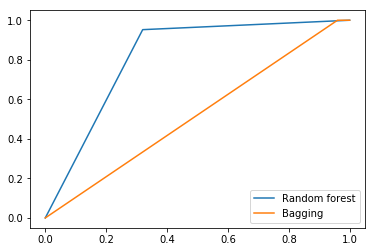

In [261]:
# Your code goes here
from sklearn import metrics
fpr_forest, tpr_forest, threshold_forest = metrics.roc_curve(y_test, y_pred_forest)
fpr_bag, tpr_bag, threshold_bag = metrics.roc_curve(y_test, y_pred_bag)

plt.plot(fpr_forest, tpr_forest, label='Random forest')
plt.plot(fpr_bag, tpr_bag, label='Bagging')
plt.legend(loc='lower right')
plt.show()

c. Explain your results in 3b. Why might the results vary across algorithms?

Random forest only uses a subset of features to decide where to split, whereas bagging uses all features.